# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|
|grc97  |grade enrolled in 1997

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [5]:
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)


# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

# The packages you'll need for t-test and regression models. 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy as sp

IPython version:      7.19.0 (need at least 1.0)
Numpy version:        1.19.2 (need at least 1.7.1)
SciPy version:         1.5.2 (need at least 0.12.0)
Pandas version:        1.2.1 (need at least 0.11.0)
Scikit-Learn version: 0.23.2 (need at least 0.13.1)


In [6]:
data = pd.read_csv (r"C:\Users\12062\Desktop\PS2\progresa_sample.csv")
data.isnull().sum()

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

In [7]:
#dropping demographic data 
df = data[['sex','indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist','dist_cap',"poor",'progresa','hohedu', 'hohwag', 'welfare_index','hohsex', 'hohage', 'age','grc97', 'sc97']]
df = df.reindex(sorted(df.columns), axis=1)
df = df.describe(include = 'all').loc[['mean','std']].T

### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre').



In [10]:
# read the csv file and create a df for the poor households in the baseline(1997) 
data = pd.read_csv (r"C:\Users\12062\Desktop\PS2\progresa_sample.csv")
data_97 = data[data["year"] == 97]
data_97_poor = data_97[data_97['poor']== 'pobre']

#group the dataframe by control and treatment groups
data_97_poor_treatment = data_97_poor.groupby('progresa')
#only getting the average(mean) value
df2 = data_97_poor_treatment.mean().T
df2['difference'] = df2['basal'] - df2['0']

df2.drop(['year'])
df2 = df2.reset_index()
df2 = df2.rename(columns={'basal':'Average value (Treatment villages)'})
df2 = df2.rename(columns={'0':'Average value (Control villages)'})
df2 = df2.rename(columns={'index':'Variable Name'})

p_value = []
for i in list(df2['Variable Name']):
    p_value.append(stats.ttest_ind(data_97_poor[data_97_poor.progresa == 'basal'][i], data_97_poor[data_97_poor.progresa == '0'][i], nan_policy='omit').pvalue)

df2['p_value'] = p_value 

df2

progresa,Variable Name,Average value (Control villages),Average value (Treatment villages),difference,p_value
0,year,97.000000,97.000000,0.000000,NaN
1,sex,0.505052,0.519317,0.014265,1.219172e-02
2,indig,0.332207,0.325986,-0.006222,2.453603e-01
3,dist_sec,2.507662,2.453122,-0.054540,3.569843e-02
4,sc,0.815186,0.822697,0.007511,9.517806e-02
5,grc,3.543050,3.531599,-0.011450,6.890151e-01
6,fam_n,7.302469,7.281327,-0.021142,4.271039e-01
7,min_dist,103.237854,107.152915,3.915060,2.358312e-16
8,dist_cap,153.769730,150.829074,-2.940656,8.415005e-04
9,hohedu,2.590348,2.663139,0.072791,1.105093e-02


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
 
* B: Why does it matter if there are differences at baseline?

* C: What does this imply about how to measure the impact of the treatment?


#### A. Are there statistically significant differences between treatment and control villages at baseline? 
- Yes, for sex, nearest distance to a secondary school, min distance to an urban center, min distance to the capital, years of schooling of head of household, montly wages of head of household, age of head of household, welfare_index has a statistically significant p_value suggesting there's a significant differences between treatment and control villiges at baseline.

#### B. Why does it matter if there are differences at baseline?
- Because our assumption on running randomization experiment is for the control and treatment group to not have heterogeneity. If the 2 groups are different in baseline, the difference we get after treatment might not be because the treatment, since we can not prove that the changes are because the treatment exsited. 

#### C. What does this imply about how to measure the impact of the treatment?
- That we will want to use some treatment to deal with the differences in baseline, so that the trend in control group approximates what would have happened in the treatment group in the absence of the treatment. 

### 1.4 Graphical exploration, part 1

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

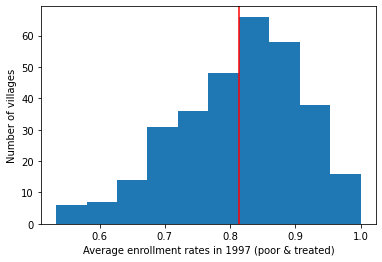

In [11]:
import matplotlib.pyplot as plt
plt.subplot(111)
#data frame for the average enrollment rate in poor households in treated villages in 1997
dft_97 = data_97_poor[(data_97_poor["progresa"] == 'basal')].groupby('village').mean()
plt.hist(dft_97['sc'])
plt.xlabel('Average enrollment rates in 1997 (poor & treated)')
plt.ylabel('Number of villages')
plt.axvline(dft_97['sc'].mean(), color= 'red')

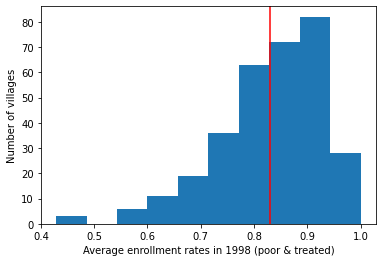

In [12]:
plt.subplot(111)
#data frame for the average enrollment rate in poor households in treated villages in 1998
data_98_poor = data[(data["year"] == 98) & (data['poor']== 'pobre')]
dft_98 = data_98_poor[(data_98_poor["progresa"] == 'basal')].groupby('village').mean()
plt.hist(dft_98['sc'])
plt.xlabel('Average enrollment rates in 1998 (poor & treated)')
plt.ylabel('Number of villages')
plt.axvline(dft_98['sc'].mean(), color= 'red')

In [13]:
stats.ttest_ind(dft_97['sc'].dropna(), dft_98['sc'].dropna())

Ttest_indResult(statistic=-2.015713486515638, pvalue=0.04424870036572115)

#### Does there appear to be a difference? Is this difference statistically significant?
- Comparing to 1997, the mean for the average enrollment rate increase slightly in 1998, the mode also increased from .8 to .9; there's is a statistically significance in the mean value for average enrollment rate between treated group from 1997 to 1998. 

### 1.5 Graphical exploration, part 2

Repeat the above exercise for poor households in **control villages**, before and after treatment. Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?

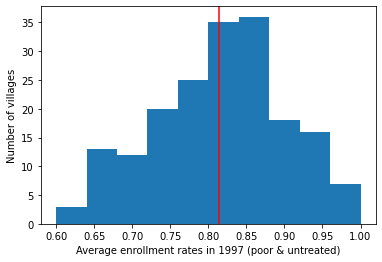

In [14]:
plt.subplot(111)

dfc_97 = data_97_poor[(data_97_poor["progresa"] == '0')].groupby('village').mean()
plt.hist(dfc_97['sc'])
plt.xlabel('Average enrollment rates in 1997 (poor & untreated)')
plt.ylabel('Number of villages')
plt.axvline(dfc_97['sc'].mean(), color= 'red')

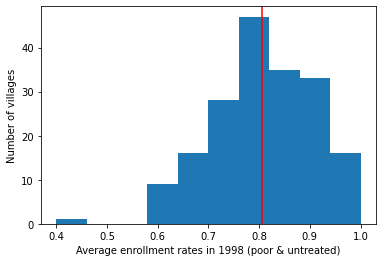

In [15]:
plt.subplot(111)

data_98_poor = data[(data["year"] == 98) & (data['poor']== 'pobre')]
dfc_98 = data_98_poor[(data_98_poor["progresa"] == '0')].groupby('village').mean()
plt.hist(dfc_98['sc'])
plt.xlabel('Average enrollment rates in 1998 (poor & untreated)')
plt.ylabel('Number of villages')
plt.axvline(dfc_98['sc'].mean(), color= 'red')

In [16]:
stats.ttest_ind(dfc_97['sc'].dropna(), dfc_98['sc'].dropna())

Ttest_indResult(statistic=0.7816669784862521, pvalue=0.4349129201749543)

#### Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?
 Visually not much a big difference in the mean for the average enrollment rate, but the spread and varience suggests there's some difference in the control group. The t test also suggests that  there is not a statistically significant difference in the control groups between the year of 1997 and 1998. Statistically speaking, we don't have to worry about the difference between control group between 1997 and 1998.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [17]:
df98_treatment = data[(data["year"] == 98) & (data['poor']== 'pobre')& (data['progresa'] == 'basal')]
df98_control = data[(data["year"] == 98) & (data['poor']== 'pobre')& (data['progresa'] == '0')]

In [18]:
# calsulate the mean for each group and compare their p-value
print('Average enrollment rate in 1998 treatment group is:', df98_treatment['sc'].mean())
print('Average enrollment rate in 1998 control group is:', df98_control['sc'].mean())

stats.ttest_ind(df98_treatment['sc'].dropna(), df98_control['sc'].dropna())

Average enrollment rate in 1998 treatment group is: 0.8464791213954308
Average enrollment rate in 1998 control group is: 0.807636956730308


Ttest_indResult(statistic=8.358720567418374, pvalue=6.636344447523235e-17)

#### Use a t-test to determine if this difference is statistically significant. What do you conclude?

- In 1998, for the controlled village that's poor, the average enrollment rate is around 0.8076; the average enrollment rate among poor households in treatment village is 0.8465. 
- The t-test suggest a statistically significant difference in control and treatment group, so we can conclude that for the poor households in 1998, the progresa had a statistically significant impact on the average enrollment. 

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [19]:
#linear model on the date in 1998 and poor 
lm = smf.ols(formula = 'sc ~ progresa', data = data_98_poor).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           6.64e-17
Time:                        13:38:35   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.00

#### Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
- The progresa coefficient is 0.0388, which suggests that for a unit increase in program progresa, results in a 0.038 increase in enrollment rate.

#### How does your regression estimate compare to your t-test estimate from part 2.1?
- 0.8076 + 1 * 0.0388 = 0.8464, which align with what we get from the simple t-test estimate.

#### Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?
- Yes, the p-value is less than .5 so we can reject the null hypothesis and suggest that the treatment has made an effect on the enrollment rate. 

#### What is the counterfactual assumption underlying this regression?
- The counterfactual assumption is if there was no treatment, there's no change in enrollment rate for treated and contorlled villages. 

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [20]:
lm_m=smf.ols(formula = 'sc ~ progresa + age + dist_sec + sex + indig + fam_n + min_dist + dist_cap + hohedu + hohwag + welfare_index + hohage', data = data_98_poor).fit()
print(lm_m.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     849.5
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:38:38   Log-Likelihood:                -7541.1
No. Observations:               27263   AIC:                         1.511e+04
Df Residuals:                   27250   BIC:                         1.521e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4431      0.01

#### How do the controls affect the point estimate of treatment effect?
- The co-effient value of progresa in the multiple regression is 0.0337, which is lower that the simple regression 0.0388. It suggests that adding additional controlled variables reduced the treatment effect of progresa.Some of the control variables have a statistically significant p-value that suggest it might have pose an affect on the treatment, such effect also affect the intercept value.  

#### How do the controls affect the standard error on the treatment effect?
- The standard error for the progresa in the multiple regression is 0.004, which is lower than the one in simple regression, 0.005. It suggests that adding control variables improved the accuracy of the prediction of effect. 

#### How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
- The intercept from the simple regression model is 0.8076, while the multiple regression model is 1.4431; 

#### Interpet the coefficient associated with the dist_sec variable. Is this evidence that the household's distance from a secondary school has a causal impact on educational attainment?
- The coefficient for dist_sec is -0.0106, a standard error of 0.001, that suggests high accuracy, also a statistically significant p-value. From the regression model, the coefficient for dist_sec suggests that for 1 unit of increase in the distance between household and secondary school, we can observe a 0.0106 unit of decrease in the enrollment rate, assuming all the other factors are the same. 

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [21]:
#2 datasets for two years respectively
df97_treatment = data_97_poor[(data_97_poor['progresa'] == 'basal')]
df97_control = data_97_poor[(data_97_poor['progresa'] == '0')] 

print ('The average of enrollment rate in Treated villages in 97: ', df97_treatment.mean()['sc'])
print ('The average of enrollment rate in Treated villages in 98: ', df98_treatment.mean()['sc'])
print ('The difference in the average of enrollment rate in Treated villages is : ', (df98_treatment.mean()['sc'] -df97_treatment.mean()['sc']))
print('---------')
print ('The average of enrollment rate in Control villages in 97: ', df97_control.mean()['sc'])
print ('The average of enrollment rate in Control villages in 98: ', df98_control.mean()['sc'])
print ('The difference in the average of enrollment rate in Control villages is : ', (df98_control.mean()['sc'] - df97_control.mean()['sc']))
print('---------')
dif_treatment = df98_treatment.mean()['sc'] -df97_treatment.mean()['sc']
dif_control = df98_control.mean()['sc'] - df97_control.mean()['sc']
print('The difference-in-difference in the average of enrollment rate is : ', dif_treatment - dif_control)

df_dd = pd.DataFrame(index=  ['Enrollment Rate before Treatment', 'Enrollment Rate after Treatment'], columns = ['Treatment Group', 'Control Group'])
df_dd.loc['Enrollment Rate before Treatment', 'Treatment Group'] = df97_treatment.mean()['sc']
df_dd.loc['Enrollment Rate before Treatment', 'Control Group'] = df97_control.mean()['sc']
df_dd.loc['Enrollment Rate after Treatment', 'Treatment Group'] = df98_treatment.mean()['sc']
df_dd.loc['Enrollment Rate after Treatment', 'Control Group'] = df98_control.mean()['sc']
df_dd

The average of enrollment rate in Treated villages in 97:  0.8226968874033842
The average of enrollment rate in Treated villages in 98:  0.8464791213954308
The difference in the average of enrollment rate in Treated villages is :  0.023782233992046597
---------
The average of enrollment rate in Control villages in 97:  0.8151860030575845
The average of enrollment rate in Control villages in 98:  0.807636956730308
The difference in the average of enrollment rate in Control villages is :  -0.007549046327276487
---------
The difference-in-difference in the average of enrollment rate is :  0.031331280319323085


,Treatment Group,Control Group
Enrollment Rate before Treatment,0.822697,0.815186
Enrollment Rate after Treatment,0.846479,0.807637


#### What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
- The difference in differences of the treated and control villages for year 98 and 97 gives the estimate of 0.0313, which is less than the simple and multiple linear regression, the DD method is more consevative in predict the correlation. 

#### What is the counterfactual assumption underlying this estimate?
- The conterfactual assumption is if there are no difference in the average enrollment rate in the treatment and control groups. 

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [22]:
#encode dummy variable
df_poor = data[data['poor'] == 'pobre']
df_poor.loc[df_poor['year'] == 97, 'after_program'] = 0
df_poor.loc[df_poor['year'] == 98, 'after_program'] = 1
df_poor.loc[df_poor['progresa'] == 'basal', 'progresa'] = 1
df_poor.loc[df_poor['progresa'] == '0', 'progresa'] = 0

C:\Users\12062\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\12062\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\12062\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [23]:
dd_lm = smf.ols(formula = 'sc ~ progresa + after_program + after_program * progresa', data = df_poor).fit()
print(dd_lm.summary())               

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           2.76e-18
Time:                        13:38:44   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [24]:
dd_lm_control = smf.ols(formula = 'sc ~ progresa + after_program +( after_program * progresa )+ age + dist_sec + sex + indig + fam_n', data = df_poor).fit()
print(dd_lm_control.summary())               

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     2777.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:38:45   Log-Likelihood:                -16813.
No. Observations:               58165   AIC:                         3.364e+04
Df Residuals:                   58156   BIC:                         3.372e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

#### What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
- Before adding any control variables, the treatment group after 1998 has an estimate of treatment effect of 0.0313 with a standard error of 0.006. That means progresa has an affect associated with a increase in the average enrollment rate of 0.0313. 

#### Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the progresa coefficient between (i) and (ii)?
- The coefficient for the progresa treatment after 1998 is the same, which suggests for every additional progresa it's associated with a 0.0313 increase in enrollment. But the intercept has increased from 0.815 to 1.533 after adding the controlled variables. Without any controlled variable, the average enrollment without progresa program is 0.815, and the average enrollment for adding additional variable is 1.533. It suggests that these other control variables may caused the difference, that there might be systematic differences exsit in treatment and control group which can cause the difference of enrollment rate. 

#### How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
- The estimates is the same with the difference in difference.They are both 0.0313. 

#### What is the counterfactual assumption underlying regression (ii)?
- The counterfactual assumption is that without the progresa program, the changes in the average enrollment rate of the treatment group won't happen, that the changes in the enrollment rate through time for treatment group and control group should be the same. 

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* Do you observe any impacts of PROGRESA on the non-poor?
* Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

In [25]:
data.poor.unique()
df_nonpoor = data[data['poor'] == 'no pobre']

df_nonpoor.loc[df_nonpoor['year'] == 97, 'after_program'] = 0
df_nonpoor.loc[df_nonpoor['year'] == 98, 'after_program'] = 1
df_nonpoor.loc[df_nonpoor['progresa'] == 'basal', 'progresa'] = 1
df_nonpoor.loc[df_nonpoor['progresa'] == '0', 'progresa'] = 0
#df_nonpoor.head()

dd_lm_nonpoor_control = smf.ols(formula = 'sc ~ progresa + after_program + after_program * progresa + age + dist_sec + sex + indig + fam_n', data = df_nonpoor).fit()
print(dd_lm_nonpoor_control.summary())           

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     503.4
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:38:47   Log-Likelihood:                -3728.8
No. Observations:               10378   AIC:                             7476.
Df Residuals:                   10369   BIC:                             7541.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

C:\Users\12062\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\12062\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\12062\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

#### Do you observe any impacts of PROGRESA on the non-poor?
- The estimate effect of progressa to non-poor households is 0.0382, suggests that there is an estimate effect of pregresa to no-poor households who received treatment. 
#### Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA might have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
- As there's more children enroll to school, it can affect other households to want to do the same, either their parents pay more attention at education opportunity, or the children themselves want to follow the trend (or peer pressuring) to be enrolled in school. 

### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

- From regression and difference in difference analysis, the estimate effect on progressa all has statistically significant p-value and increasingly accuracy suggested by decreasing standard error as we added control variables. I think the result highly suggests that Progresa had a causal impact on the enrollment rates for poor households in Mexico.
- I would run correlation matrix on the predictor variables, checking all correlations between predictor variables, if there're variables that are highly correlated with each other, we should run different models with and without them. We can also use AIC to help us to determine what are the good predictors to include in our regression. And we compare model improvement with F-test and look at the R^2, whether there's a statistically significant improvement between models. 